In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/otar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df_usq = pd.read_csv('/Users/otar/Documents/test_conda/us_equities_news_dataset.csv')

In [4]:
#df_usq[df_usq.title.str.contains('Facebook')].ticker.unique()

In [5]:
# take data only from 2016

df_usq = df_usq[df_usq.release_date > '2016-01-01']
#df_usq[(df_usq.category=='opinion') & (df_usq.ticker=='TSLA')].head()
#df_usq.ticker.unique()
df_usq[df_usq.category=='opinion'].count()

id              105232
ticker          105232
title           105232
category        105232
content         105230
release_date    105232
provider        105232
url             105232
article_id      105232
dtype: int64

In [8]:
df_usq.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [30]:
#df_usq.provider.unique()

In [29]:
df_usq[df_usq.title.str.contains('Surprise', case=False, regex=True)]

,id,ticker,title,category,content,release_date,provider,url,article_id
1598,223113,CECE,Can Donaldson DCI Pull Off A Surprise In Q1 ...,opinion,Donaldson Company Inc NYSE DCI is set to...,2016-11-28,Zacks Investment Research,https://www.investing.com/analysis/can-donalds...,200166978
1672,223187,DSG,Is A Surprise Coming For Descartes Systems DS...,opinion,Investors are always looking for stocks that a...,2017-11-26,Zacks Investment Research,https://www.investing.com/analysis/is-a-surpri...,200268421
1723,223238,DORM,Will Cooper Tire CTB Spring A Surprise In Q3...,opinion,Cooper Tire Rubber Co NYSE CTB is set t...,2017-10-24,Zacks Investment Research,https://www.investing.com/analysis/will-cooper...,200221034
1772,223287,DJCO,Inflation Surprises As CPI PPI Run Hot Intere...,opinion,If you recall the investor class was worried ...,2018-02-18,Yale Bock,https://www.investing.com/analysis/inflation-s...,200291598
2056,223571,ASGN,Will Q2 Earnings Hold A Surprise For Jacobs J...,opinion,Premium technical services company Jacobs Engi...,2016-05-02,Zacks Investment Research,https://www.investing.com/analysis/will-q2-ear...,200127365
...,...,...,...,...,...,...,...,...,...
218973,440489,WFC,The Daily Shot U S Inflation Surprises To Th...,opinion,We begin with the United States where consumer...,2016-09-19,Sober Look,https://www.investing.com/analysis/the-daily-s...,200154128
219211,440727,WFC,Investors brace for 2017 shocks after surprise...,news,By Lewis Krauskopf and Chuck Mikolajczak NEW Y...,2016-12-31,Reuters,https://www.investing.com/news/stock-market-ne...,450512
220074,441590,PFE,Why The Earnings Surprise Streak Could Continu...,opinion,Looking for a stock that has been consistently...,2019-04-02,Zacks Investment Research,https://www.investing.com/analysis/why-the-ear...,200403628
220510,442026,AMD,Why Advanced Micro Devices AMD Might Surpris...,opinion,Investors are always looking for stocks that a...,2019-10-27,Zacks Investment Research,https://www.investing.com/analysis/why-advance...,200478993


In [6]:
coms = df_usq.ticker.unique()
#coms[0]
for i in coms:
    df_temp=df_usq[df_usq.ticker==i]
    #print(i)
    


In [7]:
df_temp.shape

(203, 9)

In [11]:
# take only company titles
company = 'AAPL'
df_aapl = df_usq[df_usq.ticker==company]
# reset index, because we took a subset of the dataframe (later it will be joined with another df)
df_aapl = df_aapl.reset_index()
df_aapl.shape

(17280, 10)

In [18]:
df_aapl.head(10)

,index,id,ticker,title,category,content,release_date,provider,url,article_id
0,49183,270698,AAPL,JPMorgan cautious ahead of Apple earnings,news,JPMorgan lifts its Apple AAPL 2 9 target f...,2020-01-28,Seeking Alpha,https://invst.ly/pnjv8,2068762
1,49184,270699,AAPL,FAANG s Fall but Get Some Wall Street Love,news,By Kim Khan \nInvesting com The FAANG stocks...,2020-01-28,Investing.com,https://www.investing.com/news/stock-market-ne...,2068765
2,49185,270700,AAPL,Wall Street tumbles as virus fuels economic worry,news,By Chuck Mikolajczak NEW YORK Reuters U S ...,2020-01-28,Reuters,https://www.investing.com/news/stock-market-ne...,2068311
3,49186,270701,AAPL,Earnings Watch Apple and AMD to take earnings...,news,Two of the best performing tech stocks of 2019...,2020-01-28,MarketWatch,https://invst.ly/pnlbs,2068906
4,49187,270702,AAPL,Day Ahead Top 3 Things to Watch for Jan 28,news,By Yasin Ebrahim and Kim Khan \n1 Apple Readi...,2020-01-28,Investing.com,https://www.investing.com/news/stock-market-ne...,2068907
5,49188,270703,AAPL,China and Apple s TV service will be under the...,news,Apple is set to report fiscal first quarter re...,2020-01-28,CNBC,https://invst.ly/pnlj4,2068914
6,49189,270704,AAPL,Stocks Europe to Edge Higher Virus Prompts ...,news,By Peter Nurse \nInvesting com European stoc...,2020-01-28,Investing.com,https://www.investing.com/news/stock-market-ne...,2069039
7,49190,270705,AAPL,Tech Earnings Expected To Turn Around,opinion,Total earnings for the 87 S P 500 members that...,2020-01-28,Zacks Investment Research,https://www.investing.com/analysis/tech-earnin...,200502045
8,49191,270706,AAPL,Coronavirus outbreak may disrupt Apple s iPhon...,news,Reuters Apple Inc s O AAPL plan to ramp ...,2020-01-28,Reuters,https://www.investing.com/news/technology-news...,2069040
9,49192,270707,AAPL,These Tech Bigwigs Are Set To Beat Earnings Th...,opinion,With Tech stealing the show in the last earnin...,2020-01-28,Zacks Investment Research,https://www.investing.com/analysis/these-tech-...,200501712


In [17]:
df_aapl.title.head(10)

0            JPMorgan cautious ahead of Apple earnings
1          FAANG s Fall  but Get Some Wall Street Love
2    Wall Street tumbles as virus fuels economic worry
3    Earnings Watch  Apple and AMD to take earnings...
4          Day Ahead  Top 3 Things to Watch for Jan 28
5    China and Apple s TV service will be under the...
6    Stocks   Europe to Edge Higher  Virus Prompts ...
7                Tech Earnings Expected To Turn Around
8    Coronavirus outbreak may disrupt Apple s iPhon...
9    These Tech Bigwigs Are Set To Beat Earnings Th...
Name: title, dtype: object

In [463]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores = df_aapl['title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
df_aapl = df_aapl.join(scores_df, rsuffix='_right')

#print(reuters_aapl.isna().sum())
# Convert the date column from string to datetime
df_aapl['release_date'] = pd.to_datetime(df_aapl.release_date).dt.date


In [464]:
# create df which groups dates together adn takes the mean value 
reuters_test = df_aapl.groupby(['release_date']).mean()
reuters_test.index.min(), reuters_test.index.max() 

(datetime.date(2016, 11, 7), datetime.date(2020, 2, 12))

In [465]:
df_tt = df_aapl.groupby(['release_date'])
#df_tt.head()

In [466]:
# count news per day and multiply with the mean compound (to compare both methods)
reuters_test['news_amount'] = df_aapl.groupby(['release_date']).count()['index']
reuters_test['comp_aggr'] = reuters_test['news_amount']*reuters_test['compound']
reuters_test.head()

,index,id,article_id,neg,neu,pos,compound,news_amount,comp_aggr
release_date,,,,,,,,,
2016-11-07,199837.0,421353.0,438398.000000,0.000000,1.000000,0.000,0.0000,1,0.0000
2016-11-11,199838.5,421354.5,440018.000000,0.000000,0.902000,0.098,0.1480,2,0.2960
2016-11-14,199840.0,421356.0,440516.000000,0.000000,1.000000,0.000,0.0000,1,0.0000
2017-04-03,199823.0,421339.0,470977.000000,0.000000,0.769000,0.231,0.2732,1,0.2732
2017-04-04,199825.0,421341.0,471273.333333,0.249667,0.750333,0.000,-0.2893,3,-0.8679


In [467]:
# get stock price data from yahoo in the time frame given by the healines for the chosen company
#start = dt.datetime(2020,1,29)
#end = dt.datetime(2020,7,16)
# NDAQ - NASDAQ benchamrk? 
df = web.DataReader(company,'yahoo',reuters_test.index.min(),reuters_test.index.max())
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-06,254.250000,248.880005,252.139999,254.250000,5457100.0,253.906143
2020-02-07,253.529999,250.570007,252.639999,251.589996,4743800.0,251.249741
2020-02-10,263.000000,252.300003,252.500000,262.970001,13240200.0,262.614380
2020-02-11,272.500000,264.829987,267.320007,267.890015,15963900.0,267.527679
2020-02-12,272.799988,268.450012,270.010010,272.540009,9366100.0,272.171417


In [468]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [469]:
go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])


In [458]:
reuters_test.index = pd.to_datetime(reuters_test.index)
df.index = pd.to_datetime(df.index)

In [473]:
#df.head()

In [459]:
# merge df with headline, compound etc. and the stock prices
df_plot = reuters_test.merge(df, how='inner', left_index=True, right_index=True)

Text(0.5, 1.0, 'MSFT')

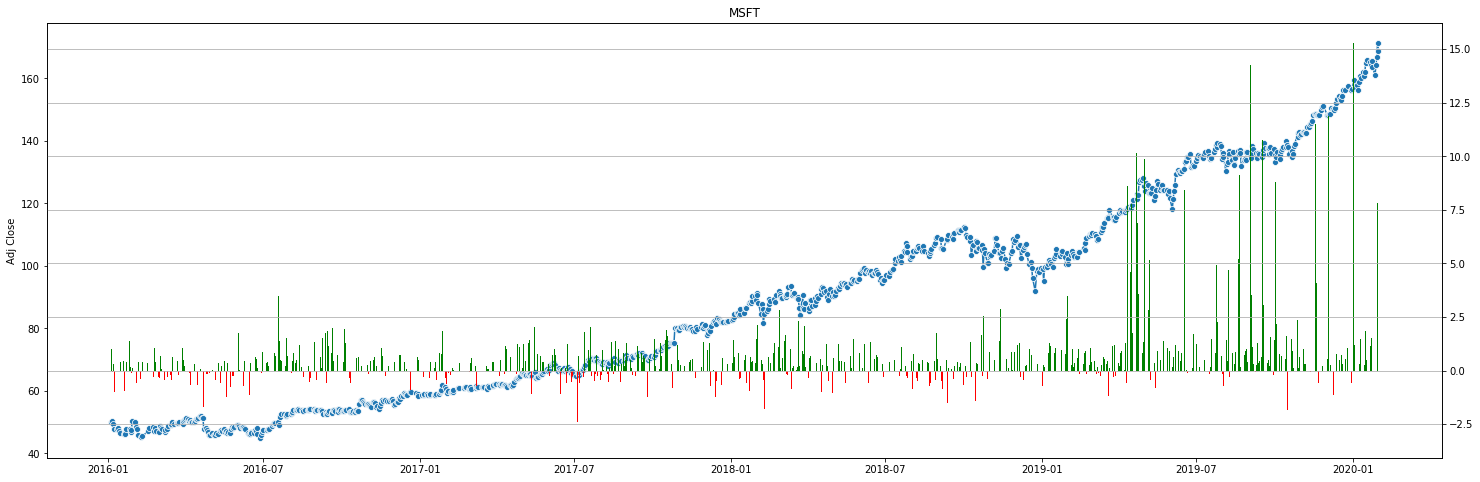

In [460]:
# plot compund and stock price 
ax = sns.set_style(style=None, rc=None )
fig, ax = plt.subplots()
sns.lineplot(df_plot.index, df_plot['Adj Close'], marker='o', ax=ax)
ax2 = ax.twinx()
#sns.lineplot(df_plot.index, df_plot['compound'], color='r', ax=ax2 ,alpha=0.5)
plt.bar(df_plot.index, df_plot['comp_aggr'], color=(df_plot['compound'] > 0).map({True: 'g',
                                                    False: 'r'}))
ax2.grid(True)
plt.title(company)

Text(0.5, 1.0, 'AAPL')

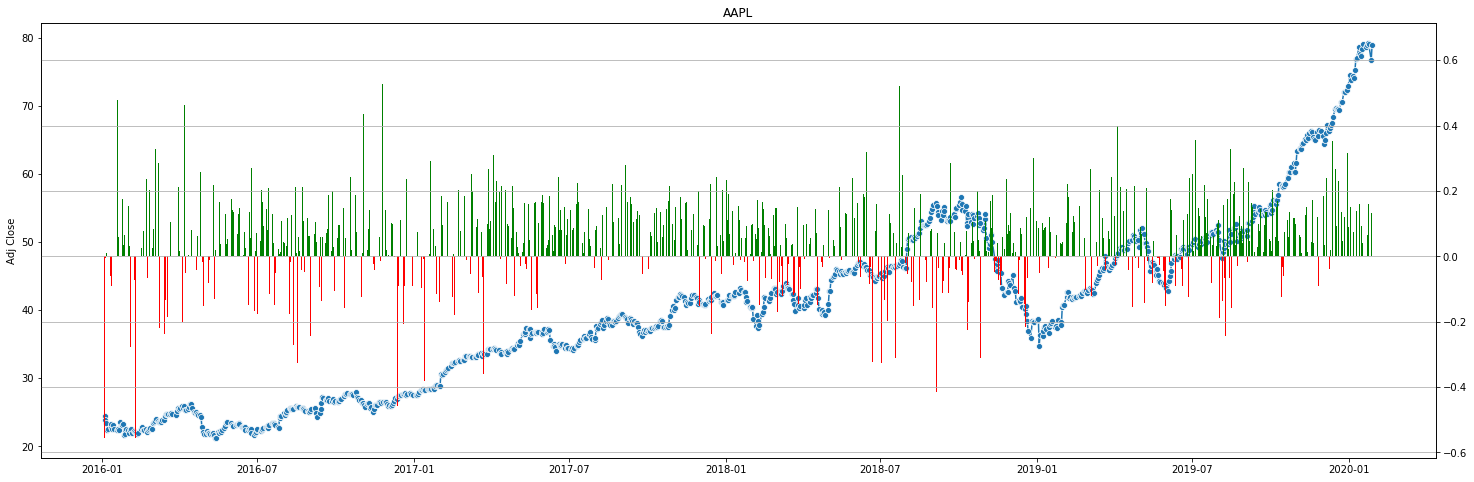

In [404]:
ax = sns.set_style(style=None, rc=None )
fig, ax = plt.subplots()
sns.lineplot(df_plot.index, df_plot['Adj Close'], marker='o', ax=ax)
ax2 = ax.twinx()
#sns.lineplot(df_plot.index, df_plot['compound'], color='r', ax=ax2 ,alpha=0.5)
plt.bar(df_plot.index, df_plot['compound'], color=(df_plot['compound'] > 0).map({True: 'g',
                                                    False: 'r'}))
ax2.grid(True)
plt.title(company)

In [439]:
#df_plot['Adj Close'][::-1], df_plot['Adj Close']

In [444]:
#df_plot['30ma_test'] = df_plot['Adj Close'].rolling(window=30, min_periods=0).mean()
# previous/present trend
df_plot['30ma'] = (df_plot['Adj Close'] - df_plot['Adj Close'].rolling(window=30, min_periods=0).mean()) / df_plot['Adj Close']
df_plot['7ma'] = (df_plot['Adj Close'] - df_plot['Adj Close'].rolling(window=7, min_periods=0).mean()) / df_plot['Adj Close']
df_plot['2ma'] = (df_plot['Adj Close'] - df_plot['Adj Close'].rolling(window=2, min_periods=0).mean()) / df_plot['Adj Close']
# future trend 
#df_plot['30ma_fut'] = (df_plot['Adj Close'] - df_plot['Adj Close'].rolling(window=30, min_periods=0).mean().shift(-2)) / df_plot['Adj Close']
#df_plot['7ma_fut'] = (df_plot['Adj Close'] - df_plot['Adj Close'].rolling(window=7, min_periods=0).mean().shift(-2)) / df_plot['Adj Close']
#df_plot['2ma_fut'] = (df_plot['Adj Close'] - df_plot['Adj Close'].rolling(window=2, min_periods=0).mean().shift(-2)) / df_plot['Adj Close']

df_plot['7ma_fut_tst'] = df_plot['Adj Close'].rolling(window=7, min_periods=0).mean().shift(-1)
#df_plot = df_plot.drop(['2ma_fut', '7ma_fut', '30ma_fut'],axis=1)
df_plot.tail(15)

,index,id,article_id,neg,neu,pos,compound,news_amount,comp_aggr,High,...,Volume,Adj Close,30ma,7ma,2ma,label_7ma,label_30ma,label_2ma,30ma_fut_tst,7ma_fut_tst
2020-01-07,49558.500000,271073.500000,1.012756e+08,0.045417,0.873417,0.081167,0.052667,12,0.6320,75.224998,...,108872000.0,74.086395,0.069390,0.008517,-0.002363,0,1,0,69.646268,73.930321
2020-01-08,49545.888889,271060.888889,4.615343e+07,0.051333,0.814667,0.133944,0.182983,18,3.2937,76.110001,...,132079200.0,75.278160,0.079571,0.017905,0.007916,1,1,0,70.027306,74.572675
2020-01-09,49527.217391,271042.217391,7.970721e+07,0.044261,0.862261,0.093478,0.071557,23,1.6458,77.607498,...,170108400.0,76.877136,0.094057,0.029976,0.010400,1,1,1,70.433835,75.164308
2020-01-10,49484.529412,270999.529412,4.874890e+07,0.039000,0.839706,0.121294,0.139412,17,2.3700,78.167503,...,140644800.0,77.050926,0.091156,0.024485,0.001128,1,1,0,70.809824,75.753456
2020-01-13,49473.083333,270988.083333,1.178150e+08,0.038917,0.856750,0.104333,0.158400,12,1.9008,79.267502,...,121532000.0,78.697075,0.105001,0.037404,0.010459,1,1,1,71.200297,76.294367
2020-01-14,49482.785714,270997.785714,1.083661e+08,0.060964,0.872750,0.066286,0.011746,28,0.3289,79.392502,...,161954400.0,77.634407,0.087907,0.017261,-0.006844,1,1,0,71.662028,76.703686
2020-01-15,49446.850000,270961.850000,9.135772e+07,0.045050,0.825600,0.129350,0.153810,20,3.0762,78.875000,...,121923600.0,77.301704,0.078930,0.007736,-0.002152,0,1,0,72.133691,77.301347
2020-01-16,49432.866667,270947.866667,1.078950e+08,0.039133,0.841933,0.118933,0.091140,15,1.3671,78.925003,...,108829200.0,78.270020,0.084426,0.012376,0.006186,0,1,0,72.555696,77.852546
2020-01-17,49395.545455,270910.545455,9.226100e+07,0.030364,0.909727,0.059909,0.039273,22,0.8640,79.684998,...,137816400.0,79.136551,0.088491,0.016225,0.005475,1,1,0,72.944597,78.098705
2020-01-21,49320.096774,270835.096774,1.364887e+08,0.057548,0.843000,0.099484,0.075177,31,2.3305,79.754997,...,110843200.0,78.600250,0.076902,0.006381,-0.003412,0,1,0,73.377527,78.360118


In [406]:
# create a list of our conditions
conditions_7ma = [
    (df_plot['7ma'] > 0.015),
    (df_plot['7ma'] >= -0.015) & (df_plot['7ma'] <= 0.015),
    (df_plot['7ma'] < -0.015) 
    ]

conditions_30ma = [
    (df_plot['30ma'] > 0.02),
    (df_plot['30ma'] >= -0.02) & (df_plot['30ma'] <= 0.02),
    (df_plot['30ma'] < -0.02) 
    ]

conditions_2ma = [
    (df_plot['2ma'] > 0.01),
    (df_plot['2ma'] >= -0.01) & (df_plot['2ma'] <= 0.01),
    (df_plot['2ma'] < -0.01) 
    ]
# create a list of the values we want to assign for each condition
values = [1,0,-1]

In [407]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_plot['label_7ma'] = np.select(conditions_7ma, values)
df_plot['label_30ma'] = np.select(conditions_30ma, values)
df_plot['label_2ma'] = np.select(conditions_2ma, values)
df_plot.head()

,index,id,article_id,neg,neu,pos,compound,news_amount,comp_aggr,High,...,Open,Close,Volume,Adj Close,30ma,7ma,2ma,label_7ma,label_30ma,label_2ma
2016-01-04,64046.500000,285561.500000,378547.000000,0.350000,0.650000,0.000000,-0.555000,2,-1.1100,26.342501,...,25.652500,26.337500,270597600.0,24.443037,0.000000,0.000000,0.000000,0,0,0
2016-01-05,63644.777778,285159.777778,378759.333333,0.052111,0.909889,0.038000,-0.004367,9,-0.0393,26.462500,...,26.437500,25.677500,223164000.0,23.830513,-0.012852,-0.012852,-0.012852,0,0,-1
2016-01-06,63072.363636,284587.363636,378875.454545,0.075000,0.829455,0.095545,0.010291,11,0.1132,25.592501,...,25.139999,25.174999,273829600.0,23.364161,-0.022046,-0.022046,-0.009980,-1,-1,0
2016-01-07,64024.333333,285539.333333,379085.666667,0.038500,0.922000,0.039500,0.024717,6,0.1483,25.032499,...,24.670000,24.112499,324377600.0,22.378082,-0.050311,-0.050311,-0.022032,-1,-1,-1
2016-01-08,61495.714286,283010.714286,379259.428571,0.207143,0.777000,0.015857,-0.279329,7,-1.9553,24.777500,...,24.637501,24.240000,283192000.0,22.496408,-0.035829,-0.035829,0.002630,-1,-1,0


In [360]:
#df_plot = df_plot.drop(['30ma_test'],axis=1)

In [411]:
import pickle

In [412]:
with open("aapl_df_labels.pickle", "wb") as f:
        pickle.dump(df_plot, f)

# Rating 

In [162]:
with open("aapl_rating_hist.pickle", "rb") as f:
        df_rating = pickle.load(f)

In [163]:
df_rating.head()

,symbol,date,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
0,AAPL,2020-10-23,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
1,AAPL,2020-10-22,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2,AAPL,2020-10-21,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
3,AAPL,2020-10-20,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
4,AAPL,2020-10-19,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy


In [166]:
#df_rating = df_rating.set_index('date')
df_rating['date'] = pd.to_datetime(df_rating.date).dt.date
df_rating = df_rating.set_index('date')

In [168]:
df_rating.head()

,symbol,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
date,,,,,,,,,,,,,,,,
2020-10-23,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-22,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-21,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-20,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
2020-10-19,AAPL,S-,5,Strong Buy,5,Strong Buy,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy


In [188]:
df_rating['ratingRecommendation'].unique()

array(['Strong Buy', 'Buy', 'Neutral'], dtype=object)

In [170]:
#df_rating.loc['2018-03-23':'2020-07-16']
df_rating.loc[dt.date(year=2018,month=3,day=23):dt.date(year=2020,month=7,day=16)]

,symbol,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
date,,,,,,,,,,,,,,,,


In [198]:
df_plot_1 = df_plot.merge(df_rating, how='inner', left_index=True, right_index=True)
df_plot_1.head()

,index,neg,neu,pos,compound,neg_right,neu_right,pos_right,compound_right,neg_right,...,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
2018-03-23,32556.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-03-27,32387.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-03-28,32373.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-03-29,32287.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,4,Buy,5,Strong Buy,5,Strong Buy
2018-04-02,32205.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,Buy,3,Neutral,5,Strong Buy,5,Strong Buy,5,Strong Buy
